In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import 

In [3]:
df = pd.read_excel(r'C:\Users\KIIT\OneDrive\Documents\Project n Paper\BrainStroke Prediction\usefile.xlsx')

In [4]:
df.head(10)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
5,0,14.0,0,0,0,1,0,161.28,19.1,0,0
6,1,52.0,0,0,1,2,1,77.59,17.7,1,0
7,1,75.0,0,1,1,3,0,243.53,27.0,0,0
8,1,32.0,0,0,1,2,0,77.67,32.3,2,0
9,1,74.0,1,0,1,3,1,205.84,54.6,0,0


<AxesSubplot:>

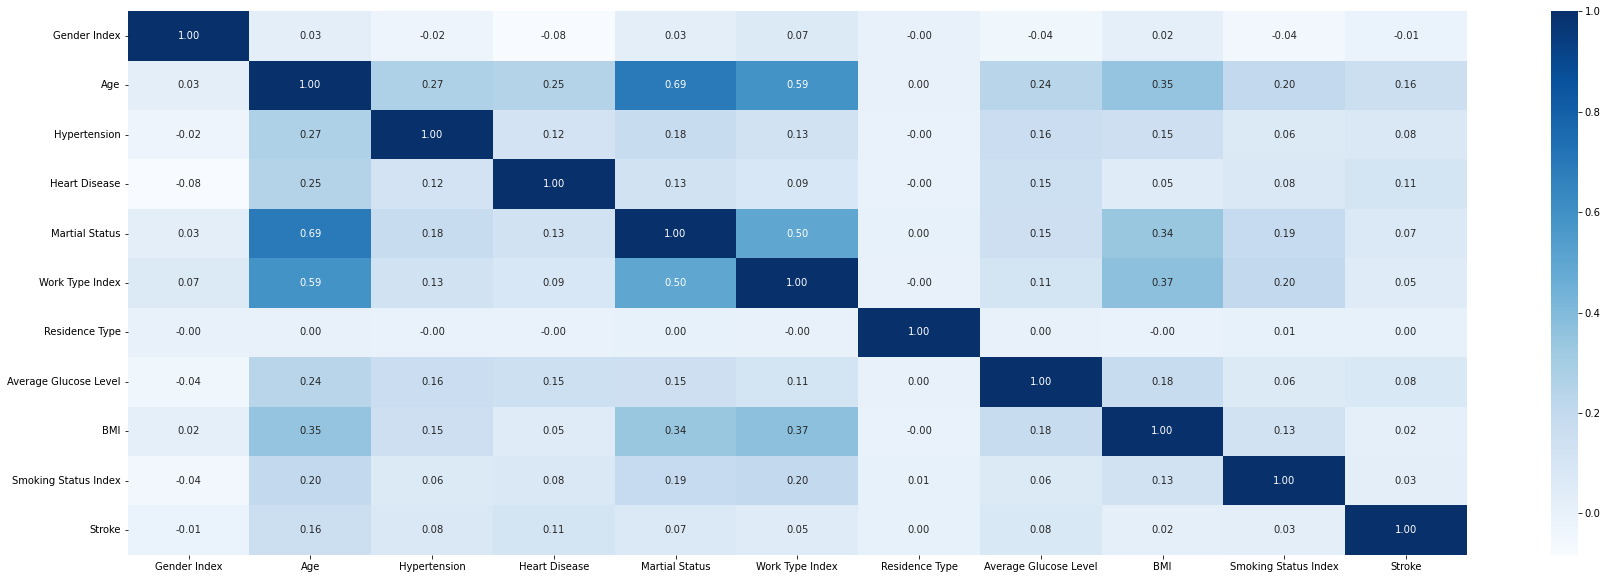

In [5]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [6]:
X = df.drop('Stroke',axis=1)
X.head(5)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index
0,0,3.0,0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1
4,1,47.0,0,0,1,2,1,210.95,50.1,0


In [7]:
y = df['Stroke']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [8]:
X.shape

(43400, 10)

In [9]:
y.shape

(43400,)

## Split Data 

In [10]:
#trained data is not validated,trained data may/may not represent whole dataset or vice versa
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [11]:
X_test.shape

(8680, 10)

In [12]:
X_train.shape

(34720, 10)

## KNN Without Validation

In [13]:
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [14]:
scale = StandardScaler()

In [15]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [16]:
X_train_scaled

array([[ 0.82969259,  1.32213599, -0.3222331 , ..., -0.71882026,
        -0.6875417 ,  0.71218423],
       [ 0.82969259, -0.93854822, -0.3222331 , ..., -0.39099967,
        -1.41014335, -0.63806076],
       [-1.20239874,  1.5437717 , -0.3222331 , ..., -0.90813491,
        -0.10946038,  0.71218423],
       ...,
       [ 0.82969259,  1.76540741, -0.3222331 , ..., -1.04803287,
        -0.63498885,  0.71218423],
       [-1.20239874,  0.56857459, -0.3222331 , ..., -0.03255466,
         1.19122259, -0.63806076],
       [ 0.82969259,  1.36646313,  3.10334351, ..., -0.85895022,
         0.56058843,  0.71218423]])

In [17]:
X_test_scaled

array([[ 0.82889999,  1.77139637, -0.3175285 , ..., -0.97004291,
         0.39483603, -0.64540635],
       [-1.20526793,  1.1899273 , -0.3175285 , ..., -0.66408654,
         0.70452884, -0.64540635],
       [ 0.82889999, -0.95703543, -0.3175285 , ..., -0.24640975,
         0.4851631 ,  2.01593669],
       ...,
       [-1.20526793, -0.42029475,  3.14932358, ..., -0.45617529,
         0.4851631 , -0.64540635],
       [-1.20526793, -1.00176382, -0.3175285 , ..., -0.88428241,
        -0.572954  , -0.64540635],
       [-1.20526793,  0.29535949,  3.14932358, ..., -0.57577641,
         1.67231888, -0.64540635]])

In [18]:
knn_v = knn_1.fit(X_train_scaled,y_train)

In [19]:
y_pred = knn_1.predict(X_test_scaled)

In [20]:
y_test

36938    0
25367    0
32252    0
34808    0
15623    0
        ..
38339    0
8543     0
3365     0
17860    0
5890     0
Name: Stroke, Length: 8680, dtype: int64

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
val = accuracy_score(y_test,y_pred)*100
val = round(val,4)
val

98.4332

In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8544,    3],
       [ 133,    0]], dtype=int64)

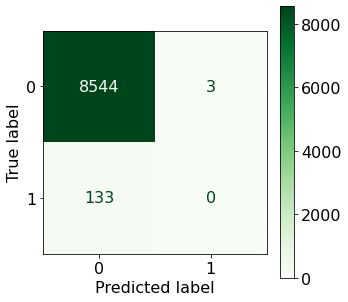

In [51]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_1.classes_,)
disp.plot(cmap='Greens')

In [25]:
knn_1.score(X_test_scaled,y_test)

0.9843317972350231

In [26]:
knn_1.score(X_train_scaled,y_train)

0.9815668202764977

## Knn_1 Training score : 98.16 and Testing Score : 98.43

## Error calculation

In [66]:
#Mean Abs Error
print(f"Mean Abs Error = {mean_absolute_error(y_test,y_pred)}")

Mean Abs Error = 0.01566820276497696


In [67]:
#Mean Sq Error
print(f"Mean Sq Error = {mean_squared_error(y_test,y_pred)}")

Mean Sq Error = 0.01566820276497696


In [64]:
#Mean Sq Error
print(f"Root Mean Sq Error = {np.sqrt(mean_squared_error(y_test,y_pred))}")

Root Mean Sq Error = 0.12517269177011797


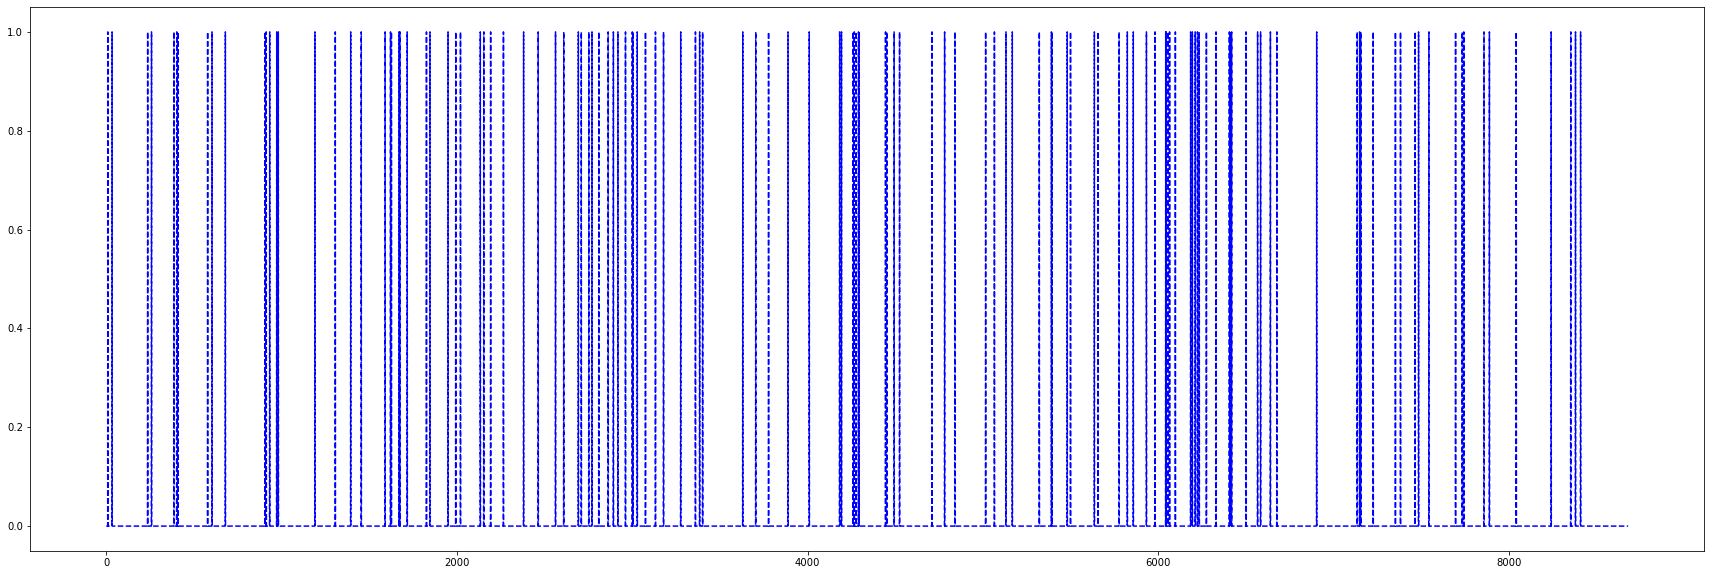

In [33]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'blue', linestyle = '--')


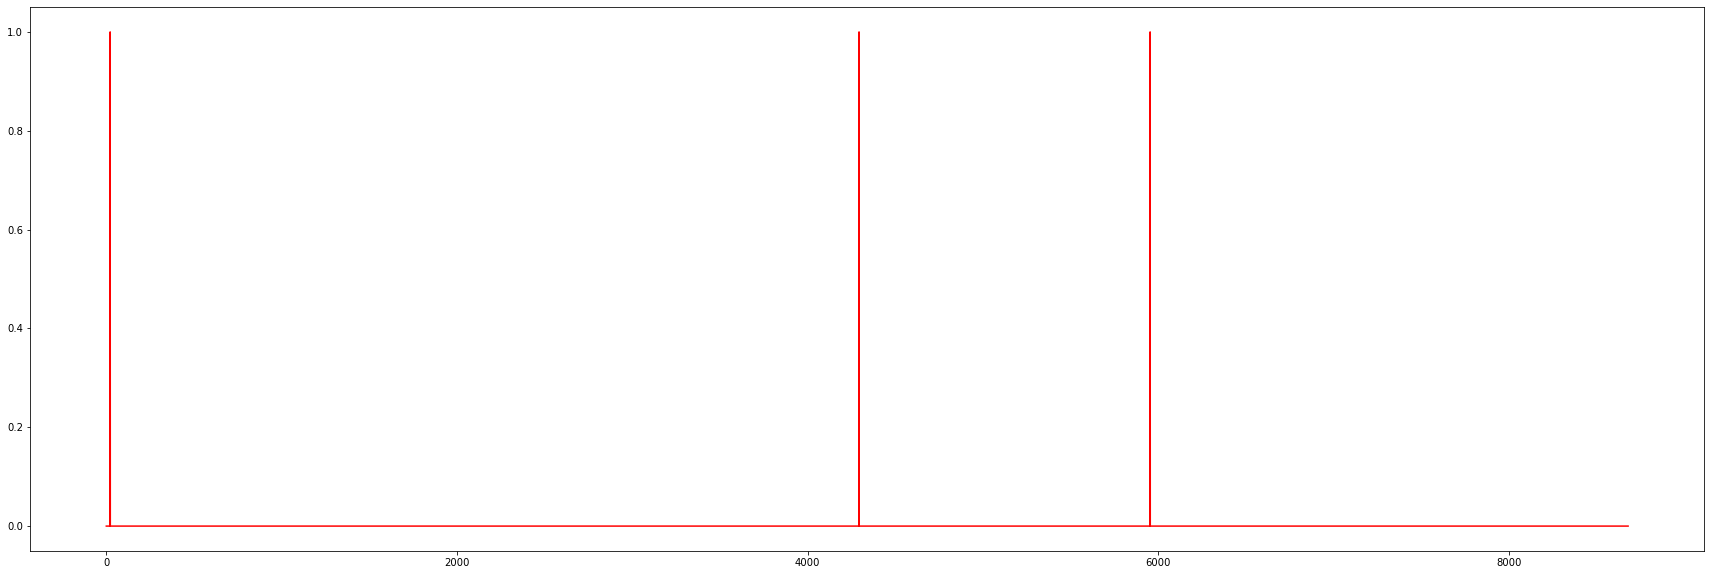

In [26]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

## KNN with Cross Validation

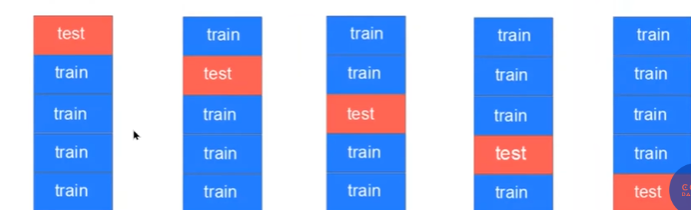

Split Data in 80:20. 

This is done for 5 times. 

5 Fold-Cross Validation

In K Folds. take x fold (1<=x<=k) as test fold, rest k-1 as train folds and checking for test accuracy

Average out these test accuracy as estimate of sample accuracy

In [72]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

In [73]:
#10 Fold Cross Validation 
scores = cross_val_score(knn_2, X, y,cv = 10, scoring = 'accuracy')

In [74]:
scores = [ 100* round(elem, 4) for elem in scores ]
print(scores)

[98.18, 98.09, 98.18, 98.22999999999999, 98.16, 98.16, 98.16, 98.13, 98.18, 98.11]


In [75]:
est_score = np.array(scores).mean()
print(est_score)

98.158


In [76]:
k_range = range(1, 30) #KNN (k) values
k_scores = []

for k in k_range:
    knn_3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_3, X, y,cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())
    

In [77]:
k_scores = [ 100* round(elem, 4) for elem in k_scores ]
print(k_scores)

[96.67, 98.11999999999999, 98.0, 98.18, 98.15, 98.19, 98.18, 98.19, 98.19, 98.19, 98.19, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2]


<AxesSubplot:>

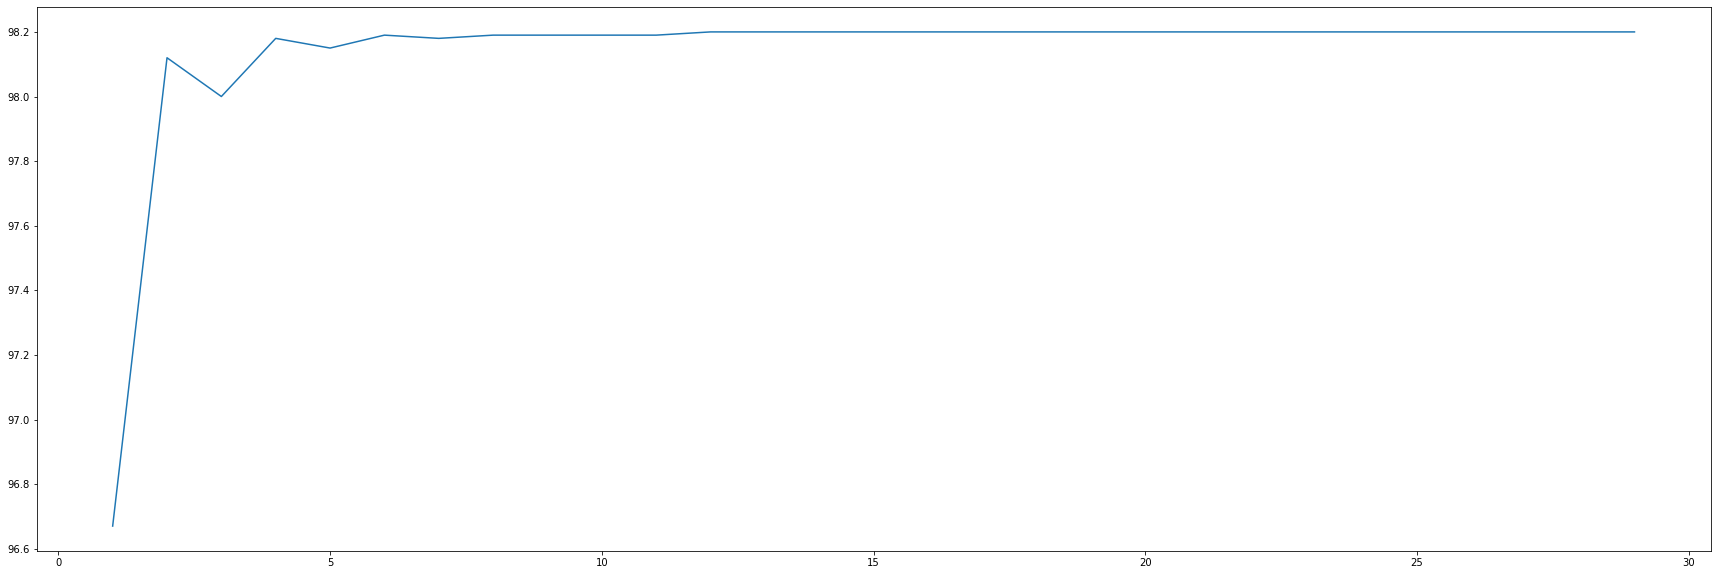

In [78]:
sns.lineplot(x=k_range,y=k_scores)

In [102]:
#k-neighbour classifier is more  accurate after k = 10. for 5-fold cross validation

In [103]:
#value of k = low => high variance, low bias (overfitting)

In [25]:
k_range = range(1, 30) #KNN (k) values
k_err_scores = []

for k in k_range:
    knn_4 = KNeighborsClassifier(n_neighbors=k)
    knn_4.fit(X_train_scaled,y_train)
    y_pred = knn_4.predict(X_test_scaled)
    k_err_scores.append(mean_squared_error(y_test,y_pred))
    

<AxesSubplot:>

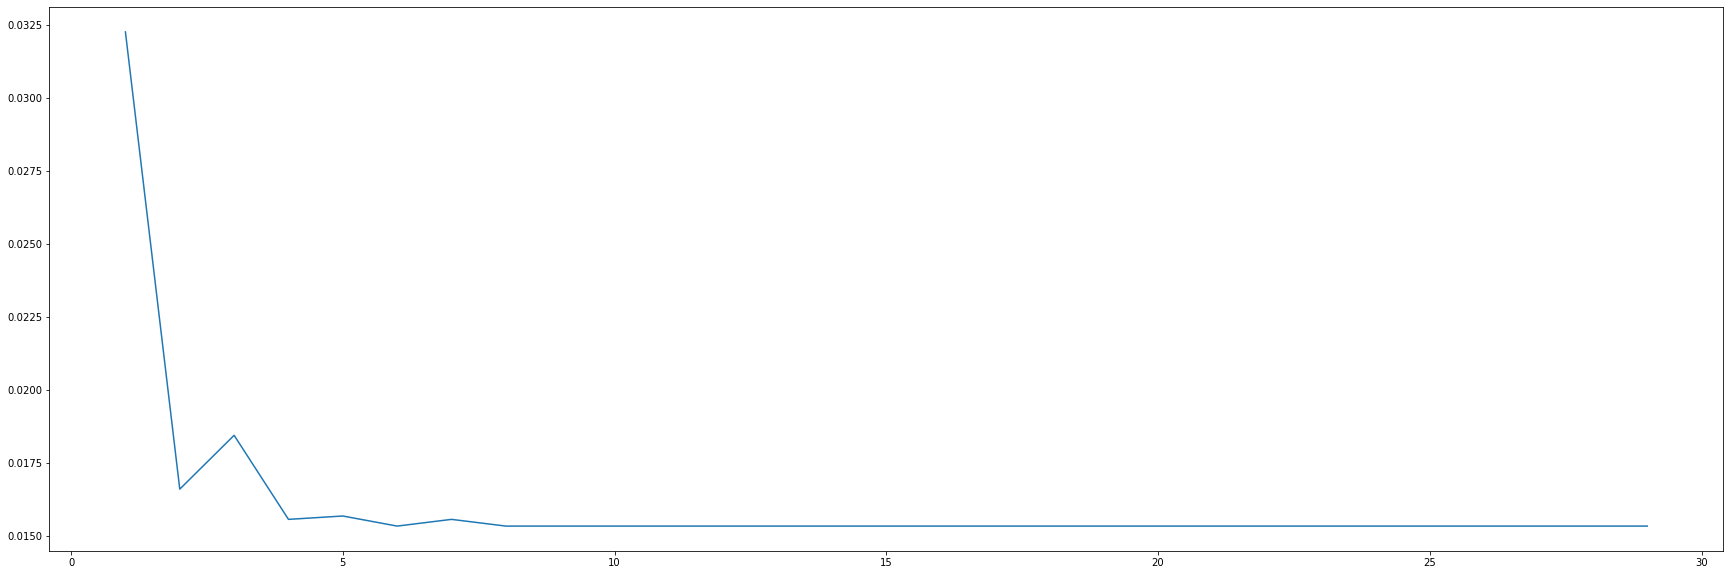

In [26]:
sns.lineplot(x=k_range,y=k_err_scores)

## Feature Importance

In [58]:
import catboost as cb

In [59]:
train_dataset = cb.Pool(X_train_scaled, y_train) 
test_dataset = cb.Pool(X_test_scaled, y_test)

In [60]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [62]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train_scaled,
                  label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test_scaled,
                  label=y_test)

In [24]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( X_train_scaled, y_train,
               eval_set=(X_test_scaled, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.088872
0:	learn: 0.1350609	test: 0.1224472	best: 0.1224472 (0)	total: 11.9ms	remaining: 11.9s
1:	learn: 0.1346205	test: 0.1220935	best: 0.1220935 (1)	total: 31.7ms	remaining: 15.8s
2:	learn: 0.1342366	test: 0.1218100	best: 0.1218100 (2)	total: 43.9ms	remaining: 14.6s
3:	learn: 0.1338874	test: 0.1215627	best: 0.1215627 (3)	total: 56.9ms	remaining: 14.2s
4:	learn: 0.1336533	test: 0.1214063	best: 0.1214063 (4)	total: 69.6ms	remaining: 13.9s
5:	learn: 0.1334202	test: 0.1212694	best: 0.1212694 (5)	total: 81.8ms	remaining: 13.6s
6:	learn: 0.1332093	test: 0.1211438	best: 0.1211438 (6)	total: 93.9ms	remaining: 13.3s
7:	learn: 0.1330172	test: 0.1210323	best: 0.1210323 (7)	total: 105ms	remaining: 13.1s
8:	learn: 0.1328690	test: 0.1209392	best: 0.1209392 (8)	total: 117ms	remaining: 12.8s
9:	learn: 0.1327216	test: 0.1208438	best: 0.1208438 (9)	total: 129ms	remaining: 12.8s
10:	learn: 0.1325830	test: 0.1207942	best: 0.1207942 (10)	total: 141ms	remaining: 12.7s
11:	learn: 0.13

101:	learn: 0.1281243	test: 0.1209161	best: 0.1203839 (19)	total: 1.23s	remaining: 10.9s
102:	learn: 0.1280936	test: 0.1209303	best: 0.1203839 (19)	total: 1.25s	remaining: 10.9s
103:	learn: 0.1280369	test: 0.1209609	best: 0.1203839 (19)	total: 1.26s	remaining: 10.8s
104:	learn: 0.1280192	test: 0.1209702	best: 0.1203839 (19)	total: 1.27s	remaining: 10.8s
105:	learn: 0.1279647	test: 0.1209848	best: 0.1203839 (19)	total: 1.28s	remaining: 10.8s
106:	learn: 0.1279414	test: 0.1209812	best: 0.1203839 (19)	total: 1.29s	remaining: 10.8s
107:	learn: 0.1279144	test: 0.1209858	best: 0.1203839 (19)	total: 1.31s	remaining: 10.8s
108:	learn: 0.1278640	test: 0.1210030	best: 0.1203839 (19)	total: 1.32s	remaining: 10.8s
109:	learn: 0.1278492	test: 0.1210094	best: 0.1203839 (19)	total: 1.33s	remaining: 10.8s
110:	learn: 0.1278223	test: 0.1210107	best: 0.1203839 (19)	total: 1.34s	remaining: 10.8s
111:	learn: 0.1277741	test: 0.1209993	best: 0.1203839 (19)	total: 1.35s	remaining: 10.7s
112:	learn: 0.1277300

200:	learn: 0.1245726	test: 0.1220059	best: 0.1203839 (19)	total: 2.45s	remaining: 9.75s
201:	learn: 0.1245515	test: 0.1219934	best: 0.1203839 (19)	total: 2.46s	remaining: 9.73s
202:	learn: 0.1245367	test: 0.1219923	best: 0.1203839 (19)	total: 2.48s	remaining: 9.72s
203:	learn: 0.1245209	test: 0.1219952	best: 0.1203839 (19)	total: 2.49s	remaining: 9.7s
204:	learn: 0.1245036	test: 0.1220014	best: 0.1203839 (19)	total: 2.5s	remaining: 9.69s
205:	learn: 0.1244850	test: 0.1220205	best: 0.1203839 (19)	total: 2.51s	remaining: 9.67s
206:	learn: 0.1244403	test: 0.1220499	best: 0.1203839 (19)	total: 2.52s	remaining: 9.66s
207:	learn: 0.1244138	test: 0.1220535	best: 0.1203839 (19)	total: 2.54s	remaining: 9.65s
208:	learn: 0.1243638	test: 0.1220660	best: 0.1203839 (19)	total: 2.55s	remaining: 9.64s
209:	learn: 0.1243359	test: 0.1220735	best: 0.1203839 (19)	total: 2.56s	remaining: 9.63s
210:	learn: 0.1243017	test: 0.1220695	best: 0.1203839 (19)	total: 2.57s	remaining: 9.61s
211:	learn: 0.1242748	t

301:	learn: 0.1220272	test: 0.1227620	best: 0.1203839 (19)	total: 3.68s	remaining: 8.5s
302:	learn: 0.1219901	test: 0.1227567	best: 0.1203839 (19)	total: 3.72s	remaining: 8.55s
303:	learn: 0.1219707	test: 0.1227571	best: 0.1203839 (19)	total: 3.74s	remaining: 8.55s
304:	learn: 0.1219422	test: 0.1227414	best: 0.1203839 (19)	total: 3.75s	remaining: 8.54s
305:	learn: 0.1219275	test: 0.1227462	best: 0.1203839 (19)	total: 3.76s	remaining: 8.53s
306:	learn: 0.1219040	test: 0.1227602	best: 0.1203839 (19)	total: 3.77s	remaining: 8.52s
307:	learn: 0.1218801	test: 0.1227566	best: 0.1203839 (19)	total: 3.79s	remaining: 8.51s
308:	learn: 0.1218491	test: 0.1227574	best: 0.1203839 (19)	total: 3.8s	remaining: 8.49s
309:	learn: 0.1218201	test: 0.1227594	best: 0.1203839 (19)	total: 3.81s	remaining: 8.48s
310:	learn: 0.1218105	test: 0.1227715	best: 0.1203839 (19)	total: 3.82s	remaining: 8.47s
311:	learn: 0.1218038	test: 0.1227686	best: 0.1203839 (19)	total: 3.83s	remaining: 8.45s
312:	learn: 0.1217639	t

397:	learn: 0.1197125	test: 0.1235372	best: 0.1203839 (19)	total: 4.93s	remaining: 7.46s
398:	learn: 0.1196900	test: 0.1235437	best: 0.1203839 (19)	total: 4.94s	remaining: 7.44s
399:	learn: 0.1196579	test: 0.1235679	best: 0.1203839 (19)	total: 4.95s	remaining: 7.43s
400:	learn: 0.1196353	test: 0.1235792	best: 0.1203839 (19)	total: 4.96s	remaining: 7.42s
401:	learn: 0.1196012	test: 0.1235992	best: 0.1203839 (19)	total: 4.98s	remaining: 7.4s
402:	learn: 0.1195798	test: 0.1235974	best: 0.1203839 (19)	total: 4.99s	remaining: 7.39s
403:	learn: 0.1195624	test: 0.1236023	best: 0.1203839 (19)	total: 5s	remaining: 7.38s
404:	learn: 0.1195382	test: 0.1236159	best: 0.1203839 (19)	total: 5.01s	remaining: 7.37s
405:	learn: 0.1195100	test: 0.1236249	best: 0.1203839 (19)	total: 5.03s	remaining: 7.35s
406:	learn: 0.1194812	test: 0.1236587	best: 0.1203839 (19)	total: 5.04s	remaining: 7.34s
407:	learn: 0.1194398	test: 0.1236725	best: 0.1203839 (19)	total: 5.05s	remaining: 7.33s
408:	learn: 0.1194224	tes

497:	learn: 0.1175769	test: 0.1241327	best: 0.1203839 (19)	total: 6.16s	remaining: 6.21s
498:	learn: 0.1175461	test: 0.1241382	best: 0.1203839 (19)	total: 6.17s	remaining: 6.2s
499:	learn: 0.1175301	test: 0.1241372	best: 0.1203839 (19)	total: 6.18s	remaining: 6.18s
500:	learn: 0.1175175	test: 0.1241392	best: 0.1203839 (19)	total: 6.2s	remaining: 6.17s
501:	learn: 0.1174875	test: 0.1241424	best: 0.1203839 (19)	total: 6.21s	remaining: 6.16s
502:	learn: 0.1174632	test: 0.1241309	best: 0.1203839 (19)	total: 6.21s	remaining: 6.14s
503:	learn: 0.1174372	test: 0.1241687	best: 0.1203839 (19)	total: 6.23s	remaining: 6.13s
504:	learn: 0.1174213	test: 0.1241737	best: 0.1203839 (19)	total: 6.24s	remaining: 6.11s
505:	learn: 0.1174112	test: 0.1241817	best: 0.1203839 (19)	total: 6.25s	remaining: 6.1s
506:	learn: 0.1173814	test: 0.1241835	best: 0.1203839 (19)	total: 6.26s	remaining: 6.09s
507:	learn: 0.1173549	test: 0.1241973	best: 0.1203839 (19)	total: 6.27s	remaining: 6.07s
508:	learn: 0.1173307	te

602:	learn: 0.1155525	test: 0.1246776	best: 0.1203839 (19)	total: 7.41s	remaining: 4.88s
603:	learn: 0.1155254	test: 0.1246588	best: 0.1203839 (19)	total: 7.42s	remaining: 4.86s
604:	learn: 0.1155072	test: 0.1246649	best: 0.1203839 (19)	total: 7.43s	remaining: 4.85s
605:	learn: 0.1154744	test: 0.1246781	best: 0.1203839 (19)	total: 7.44s	remaining: 4.84s
606:	learn: 0.1154587	test: 0.1246715	best: 0.1203839 (19)	total: 7.45s	remaining: 4.82s
607:	learn: 0.1154290	test: 0.1246759	best: 0.1203839 (19)	total: 7.46s	remaining: 4.81s
608:	learn: 0.1153950	test: 0.1247005	best: 0.1203839 (19)	total: 7.47s	remaining: 4.8s
609:	learn: 0.1153776	test: 0.1247013	best: 0.1203839 (19)	total: 7.49s	remaining: 4.79s
610:	learn: 0.1153363	test: 0.1247246	best: 0.1203839 (19)	total: 7.53s	remaining: 4.79s
611:	learn: 0.1153239	test: 0.1247285	best: 0.1203839 (19)	total: 7.55s	remaining: 4.78s
612:	learn: 0.1153084	test: 0.1247284	best: 0.1203839 (19)	total: 7.56s	remaining: 4.77s
613:	learn: 0.1153004	

696:	learn: 0.1138085	test: 0.1252152	best: 0.1203839 (19)	total: 8.64s	remaining: 3.76s
697:	learn: 0.1137997	test: 0.1252164	best: 0.1203839 (19)	total: 8.65s	remaining: 3.74s
698:	learn: 0.1137971	test: 0.1252170	best: 0.1203839 (19)	total: 8.66s	remaining: 3.73s
699:	learn: 0.1137704	test: 0.1252031	best: 0.1203839 (19)	total: 8.68s	remaining: 3.72s
700:	learn: 0.1137555	test: 0.1252068	best: 0.1203839 (19)	total: 8.69s	remaining: 3.71s
701:	learn: 0.1137341	test: 0.1252128	best: 0.1203839 (19)	total: 8.7s	remaining: 3.69s
702:	learn: 0.1137164	test: 0.1252170	best: 0.1203839 (19)	total: 8.71s	remaining: 3.68s
703:	learn: 0.1136877	test: 0.1252328	best: 0.1203839 (19)	total: 8.73s	remaining: 3.67s
704:	learn: 0.1136644	test: 0.1252541	best: 0.1203839 (19)	total: 8.74s	remaining: 3.66s
705:	learn: 0.1136531	test: 0.1252576	best: 0.1203839 (19)	total: 8.76s	remaining: 3.65s
706:	learn: 0.1136296	test: 0.1252685	best: 0.1203839 (19)	total: 8.77s	remaining: 3.63s
707:	learn: 0.1136061	

795:	learn: 0.1122428	test: 0.1257896	best: 0.1203839 (19)	total: 9.88s	remaining: 2.53s
796:	learn: 0.1122383	test: 0.1257889	best: 0.1203839 (19)	total: 9.89s	remaining: 2.52s
797:	learn: 0.1122329	test: 0.1257910	best: 0.1203839 (19)	total: 9.91s	remaining: 2.51s
798:	learn: 0.1122125	test: 0.1257994	best: 0.1203839 (19)	total: 9.92s	remaining: 2.5s
799:	learn: 0.1121850	test: 0.1257977	best: 0.1203839 (19)	total: 9.93s	remaining: 2.48s
800:	learn: 0.1121660	test: 0.1258044	best: 0.1203839 (19)	total: 9.94s	remaining: 2.47s
801:	learn: 0.1121528	test: 0.1258026	best: 0.1203839 (19)	total: 9.95s	remaining: 2.46s
802:	learn: 0.1121343	test: 0.1258006	best: 0.1203839 (19)	total: 9.96s	remaining: 2.44s
803:	learn: 0.1121156	test: 0.1258102	best: 0.1203839 (19)	total: 9.98s	remaining: 2.43s
804:	learn: 0.1120979	test: 0.1258135	best: 0.1203839 (19)	total: 9.99s	remaining: 2.42s
805:	learn: 0.1120785	test: 0.1258354	best: 0.1203839 (19)	total: 10s	remaining: 2.41s
806:	learn: 0.1120718	te

898:	learn: 0.1105580	test: 0.1262409	best: 0.1203839 (19)	total: 11.2s	remaining: 1.25s
899:	learn: 0.1105387	test: 0.1262653	best: 0.1203839 (19)	total: 11.2s	remaining: 1.24s
900:	learn: 0.1105286	test: 0.1262721	best: 0.1203839 (19)	total: 11.2s	remaining: 1.23s
901:	learn: 0.1105182	test: 0.1262781	best: 0.1203839 (19)	total: 11.2s	remaining: 1.22s
902:	learn: 0.1105092	test: 0.1262799	best: 0.1203839 (19)	total: 11.2s	remaining: 1.2s
903:	learn: 0.1104918	test: 0.1262826	best: 0.1203839 (19)	total: 11.2s	remaining: 1.19s
904:	learn: 0.1104688	test: 0.1262970	best: 0.1203839 (19)	total: 11.2s	remaining: 1.18s
905:	learn: 0.1104462	test: 0.1263149	best: 0.1203839 (19)	total: 11.2s	remaining: 1.17s
906:	learn: 0.1104370	test: 0.1263227	best: 0.1203839 (19)	total: 11.3s	remaining: 1.15s
907:	learn: 0.1104175	test: 0.1263336	best: 0.1203839 (19)	total: 11.3s	remaining: 1.14s
908:	learn: 0.1103898	test: 0.1263337	best: 0.1203839 (19)	total: 11.3s	remaining: 1.13s
909:	learn: 0.1103745	

991:	learn: 0.1092772	test: 0.1266780	best: 0.1203839 (19)	total: 12.4s	remaining: 100ms
992:	learn: 0.1092712	test: 0.1266800	best: 0.1203839 (19)	total: 12.4s	remaining: 87.5ms
993:	learn: 0.1092526	test: 0.1266987	best: 0.1203839 (19)	total: 12.4s	remaining: 75ms
994:	learn: 0.1092398	test: 0.1266982	best: 0.1203839 (19)	total: 12.4s	remaining: 62.5ms
995:	learn: 0.1092212	test: 0.1266987	best: 0.1203839 (19)	total: 12.4s	remaining: 50ms
996:	learn: 0.1092057	test: 0.1267127	best: 0.1203839 (19)	total: 12.5s	remaining: 37.5ms
997:	learn: 0.1091799	test: 0.1267224	best: 0.1203839 (19)	total: 12.5s	remaining: 25ms
998:	learn: 0.1091661	test: 0.1267363	best: 0.1203839 (19)	total: 12.5s	remaining: 12.5ms
999:	learn: 0.1091476	test: 0.1267312	best: 0.1203839 (19)	total: 12.5s	remaining: 0us

bestTest = 0.1203838967
bestIteration = 19

Shrink model to first 20 iterations.


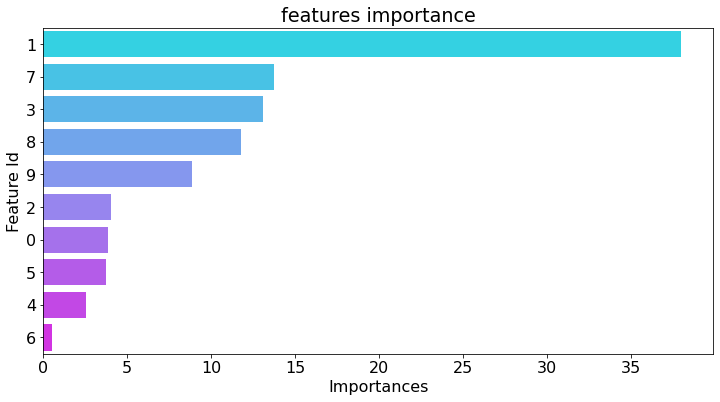

In [56]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [57]:
df_feature_importance

,Feature Id,Importances
0,1,37.967143
1,7,13.715115
2,3,13.080671
3,8,11.745537
4,9,8.837967
5,2,4.011100
6,0,3.824584
7,5,3.743409
8,4,2.550068
9,6,0.524407
